In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Генерируем данные для обучения
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

In [60]:
# Создаем экземпляр SVM и обучаем модель с использованием линейного ядра
C = 5  # параметр регуляризации SVM
linear_svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# Создаем экземпляр SVM и обучаем модель с использованием RBF-ядро
rbf_svc = svm.SVC(kernel='rbf', gamma=0.68, C=C).fit(X, y)

# Создаем экземпляр SVM и обучаем модель с использованием полиномиального ядра
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X, y)

# Создаем экземпляр SVM и обучаем модель с использованием сигмоидного ядра
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X, y)

# оцениваем качество моделей
print('Accuracy of linear kernel:', accuracy_score(y, linear_svc.predict(X)))
print('Accuracy of RBF kernel:', accuracy_score(y, rbf_svc.predict(X)))
print('Accuracy of polynomial kernel:', accuracy_score(y, poly_svc.predict(X)))
print('Accuracy of sigmoid kernel:', accuracy_score(y, sig_svc.predict(X)))

Accuracy of linear kernel: 0.898
Accuracy of RBF kernel: 0.925
Accuracy of polynomial kernel: 0.916
Accuracy of sigmoid kernel: 0.808


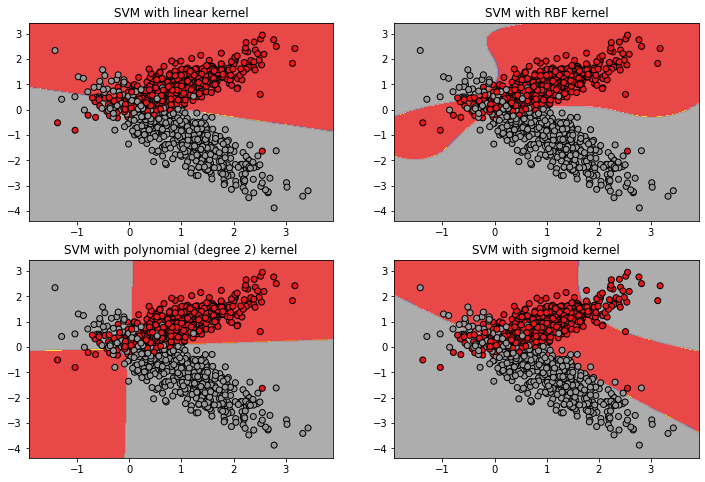

In [61]:
# Создаем сетку для графиков
h = 0.02  # шаг в сетке
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Заголовки графиков
titles = ['SVM with linear kernel',
          'SVM with RBF kernel',
          'SVM with polynomial (degree 2) kernel',
          'SVM with sigmoid kernel']

# Создаем график
plt.figure(figsize=(12, 8))

for i, clf in enumerate((linear_svc, rbf_svc, poly_svc, sig_svc)):
    # Рисуем границы принятия решений на графике
    plt.subplot(2, 2, i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    # Рисуем точки данных
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    plt.title(titles[i])

plt.show()